## (2017 Census Income Per Capita analysis)
## by (Christopher James)

## Preliminary Wrangling

This dataset contains population, travel, work, and income information from the 2017 Census Bureau ACS survey. Wrangling was done in the notebook 'census_wrangle.ipynb' A summary of this can be found in the file 'wrangle_report.pdf.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Set option to allow all rows and colums to be displayed in notebook.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
# Any needed functions

# returns mean absolute error for random forests.
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# Function to generate a random sample of df rows.
def df_sample(dataframe, samp_size):
    samples = np.random.choice(dataframe.shape[0], samp_size, replace = False)
    return dataframe.loc[samples,:]

In [3]:
# Load CSV file into dataframe
df_original = pd.read_csv('acs2017_census_tract_data_master.csv')

In [4]:
# Copy dataframe before analysis begins.
df = df_original.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

In [15]:
corr = df.corr()['IncomePerCap']
corr

TractId            -0.063549
TotalPop            0.040227
Men                 0.030903
Women               0.047965
Hispanic           -0.304357
White               0.373485
Black              -0.283210
Native             -0.076966
Asian               0.216731
Pacific            -0.024617
VotingAgeCitizen    0.114150
Income              0.836809
IncomeErr           0.601452
IncomePerCap        1.000000
IncomePerCapErr     0.752062
Poverty            -0.594810
ChildPoverty       -0.571800
Professional        0.800398
Service            -0.580823
Office             -0.134562
Construction       -0.408269
Production         -0.542442
Drive              -0.046829
Carpool            -0.347200
Transit             0.077501
Walk               -0.026335
OtherTransp         0.007608
WorkAtHome          0.441172
MeanCommute         0.123553
Employed            0.194114
PrivateWork        -0.014917
PublicWork         -0.071715
SelfEmployed        0.164517
FamilyWork          0.021470
Unemployment  

### What is the structure of your dataset?

This dataset consists of 74,001 rows along with 37 columns. Those columns are 'TractId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', and 'Unemployment'.

### What is/are the main feature(s) of interest in your dataset?

I am interested in the attributes that contribute to income per capita.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Based on the coorelation chart above, the following attributes are strong enough to further examine: Poverty, ChildPoverty, Professional, Service, Construction, Production, WorkAtHome, and Unemployment.

## Univariate Exploration

First, I will examine the distributions of each of the features that I intend to analyse.

In [16]:
df['Poverty'].describe()

count    73159.000000
mean        16.118186
std         12.691045
min          0.000000
25%          6.900000
50%         12.600000
75%         21.800000
max        100.000000
Name: Poverty, dtype: float64

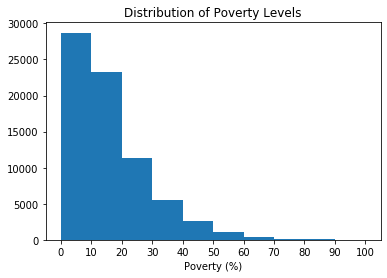

In [18]:
# Plot distribution of poverty.
bins = np.arange(0, 100 + 1, 10)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'Poverty', bins = bins)
plt.xticks(ticks, labels)
plt.title('Distribution of Poverty Levels')
plt.xlabel('Poverty (%)');

Poverty levels are rightly skewed quite a bit. They start off between 0 and 10 percent, and rapidy decline from there, espicially after 20%. Few Census tracts have poverty levels abouve 70%. Now, on to child poverty. 

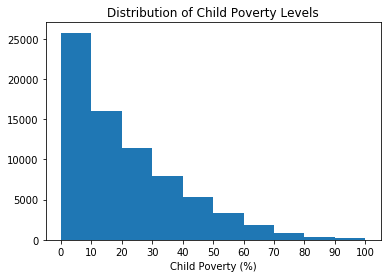

In [19]:
# Plot distribution of child poverty.
bins = np.arange(0, 100 + 1, 10)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'ChildPoverty', bins = bins)
plt.xticks(ticks, labels)
plt.title('Distribution of Child Poverty Levels')
plt.xlabel('Child Poverty (%)');

Much like poverty levels, the child poverty levels are rightly skewed, but in a somewhat less dramatic way. The fall after 20% onward is less pronounced. In addition, there are more places that have child poverty levels abouve 70%. Next, I will look at professional job levels.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!